In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df
Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem?
Redo the read_csv() call to correct this issue - do not modify the
original csv file.

In [2]:
gdp_df = pd.read_csv("gdppercap.csv")
# iuse = pd.read_csv("UNInternetusage.csv",error_bad_lines=False)

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
ngdp_df = gdp_df.drop(gdp_df.index[-2:])

Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [5]:
ngdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [6]:
nngdp_df = ngdp_df.drop("Value Footnotes", axis=1)

In [7]:
new_columns = {'Country or Area' : 'Country',
               'Year': 'Years',
               'Value': 'GDP',}
nngdp_df.rename(columns = new_columns, inplace=True)

In [8]:
nngdp_df.tail()

,Country,Years,GDP
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


In [9]:
nngdp_df.head()

,Country,Years,GDP
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [10]:
nngdp_df.tail()

,Country,Years,GDP
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.

In [11]:
nngdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6729 non-null   object 
 1   Years    6729 non-null   object 
 2   GDP      6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 210.3+ KB


3 columns and 6731 rows. The data for country and years are object. The gdp is a float.

In [12]:
nngdp_df['Years'].astype(float)

0       2018.0
1       2017.0
2       2016.0
3       2015.0
4       2014.0
         ...  
6724    1994.0
6725    1993.0
6726    1992.0
6727    1991.0
6728    1990.0
Name: Years, Length: 6729, dtype: float64

Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?

In [13]:
nngdp_df['Years'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990'], dtype=object)

In [14]:
nngdp_df['Years'].value_counts()

2011    243
2009    241
2010    241
2012    241
2013    241
2015    240
2014    240
2008    240
2007    239
2017    239
2016    239
2004    238
2003    238
2005    238
2002    238
2006    238
2001    237
2000    236
1999    228
1998    227
1997    226
2018    226
1995    224
1996    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Years, dtype: int64

How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?

In [15]:
nngdp_df['Country'].value_counts()

Sweden                       29
Puerto Rico                  29
Latin America & Caribbean    29
Finland                      29
Central African Republic     29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

In [18]:
nngdp_df['Years'=2014].describe()

SyntaxError: invalid syntax (<ipython-input-18-aaa7379cb6d5>, line 1)

Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.


In [17]:
gdp_2014 = nngdp_df.groupby("Years").get_group('2014')

Use .describe() to find the summary statistics for GDP per capita in
2014

In [19]:
gdp_2014.head()

,Country,Years,GDP
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014819F93760>]],
      dtype=object)

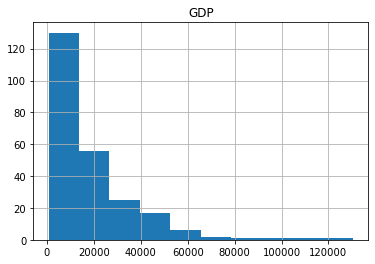

In [23]:
gdp_2014.hist(column='GDP', bins=10)

In [24]:
gdp_2014["GDP"].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP, dtype: float64

Find the top 5 counties and bottom 5 countries by GDP per capita in
2014.

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.

In [32]:
nngdp_df.pivot_table(values='Years', index='Country',dropna=True)

DataError: No numeric types to aggregate

Create a new column in gdp_pivoted named Percent_Change. This
column should contain the percent change in GDP_Per_Capita from 1990
to 2017. Hint: Percent change is calculated as 100*(New Value - Old
Value) / Old Value.

In [ ]:
gdp_pivoted

#margins in pivot table

How many countries experienced a negative percent change in GDP per
capita from 1990 to 2017?

Which country had the highest % change in GDP per capita? Create a
line plot showing this country’s GDP per capita for all years from 1990
to 2017. Create another showing the country with the second highest %
change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

Read in continents.csv contained in the data folder into a new dataframe
called continents. We will be using this dataframe to add a new column
to our dataset.

In [31]:
continents = pd.read_csv("continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in
both data frames. Save the result back to gdp_df.

Determine the number of countries per continent. Create a bar chart
showing this

Creat a seaborn boxplot showing GDP per capita in 2014 split out by
continent. What do you notice?


Read in internet_use.csv into a DataFrame called internet_df. You will
most likely get an error message when doing this - figure out what is going
wrong and fix it. Take a look at the first and last five rows and make any
corrections to your read_csv() call to fix this. Again, do not modify the
original datasets.

In [35]:
internet_df = pd.read_csv("UNInternetusage.csv", error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [37]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [38]:
internet_df = ngdp_df.drop("Value Footnotes", axis=1)